<div align = "center">

# **Modelación de Severidad**

</div>

In [10]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuraciones de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
sns.set_palette("husl")

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


In [11]:
# Cargar base de datos de siniestros con clustering
df = pd.read_csv('../data/tmp/siniestros_consolidado_clustered.csv')

print("=" * 80)
print("INFORMACIÓN GENERAL DE LA BASE DE DATOS")
print("=" * 80)
print(f"\nDimensiones del dataset: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"\nColumnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n" + "=" * 80)
print("TIPOS DE DATOS")
print("=" * 80)
print(df.dtypes)

print("\n" + "=" * 80)
print("PRIMERAS 5 FILAS")
print("=" * 80)
print(df.head())

print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 80)
print(df.describe())

print("\n" + "=" * 80)
print("DISTRIBUCIÓN POR AMPARO (CLUSTER)")
print("=" * 80)
print(df['AMPARO'].value_counts().sort_index())
print(f"\nTotal de siniestros: {len(df):,}")

INFORMACIÓN GENERAL DE LA BASE DE DATOS

Dimensiones del dataset: 5,746 filas x 11 columnas

Columnas disponibles:
   1. POLIZA
   2. AMPARO
   3. VALOR_ASEGURADO
   4. RESERVA_ACTUAL_EQUI
   5. PAGOS
   6. DEPARTAMENTO_SINIESTRO
   7. FECHA_DE_SINIESTRO
   8. FECHA_AVISO
   9. cod_suc
  10. FECHA_SINIESTRO_DT
  11. AMPARO_ORIGINAL

TIPOS DE DATOS
POLIZA                      int64
AMPARO                     object
VALOR_ASEGURADO           float64
RESERVA_ACTUAL_EQUI       float64
PAGOS                     float64
DEPARTAMENTO_SINIESTRO     object
FECHA_DE_SINIESTRO         object
FECHA_AVISO                object
cod_suc                     int64
FECHA_SINIESTRO_DT         object
AMPARO_ORIGINAL            object
dtype: object

PRIMERAS 5 FILAS
   POLIZA                 AMPARO  VALOR_ASEGURADO  RESERVA_ACTUAL_EQUI  \
0    1450     CALIDAD DE LA OBRA     5.460002e+08          546000205.0   
1    6232     CALIDAD DE LA OBRA     2.849548e+08           16893479.0   
2    6296           CU

In [12]:
# Cálculo de EXPOSICION y PROPORCION_DE_PAGO

print("=" * 80)
print("CÁLCULO DE EXPOSICIÓN Y PROPORCIÓN DE PAGO")
print("=" * 80)

# EXPOSICION = min(VALOR_ASEGURADO, max(PAGOS, RESERVA_ACTUAL_EQUI))
df['MAX_PAGO_RESERVA'] = df[['PAGOS', 'RESERVA_ACTUAL_EQUI']].max(axis=1)
df['EXPOSICION'] = df[['VALOR_ASEGURADO', 'MAX_PAGO_RESERVA']].min(axis=1)

# PROPORCION_DE_PAGO = EXPOSICION / VALOR_ASEGURADO
# Evitar división por cero
df['PROPORCION_DE_PAGO'] = np.where(
    df['VALOR_ASEGURADO'] > 0,
    df['EXPOSICION'] / df['VALOR_ASEGURADO'],
    0
)

print("\nNuevas columnas calculadas:")
print("  - MAX_PAGO_RESERVA: máximo entre PAGOS y RESERVA_ACTUAL_EQUI")
print("  - EXPOSICION: min(VALOR_ASEGURADO, MAX_PAGO_RESERVA)")
print("  - PROPORCION_DE_PAGO: EXPOSICION / VALOR_ASEGURADO")

print("\n" + "=" * 80)
print("ESTADÍSTICAS DE LAS NUEVAS VARIABLES")
print("=" * 80)

print("\nMAX_PAGO_RESERVA:")
print(df['MAX_PAGO_RESERVA'].describe())

print("\n\nEXPOSICION:")
print(df['EXPOSICION'].describe())

print("\n\nPROPORCION_DE_PAGO:")
print(df['PROPORCION_DE_PAGO'].describe())

print("\n" + "=" * 80)
print("DISTRIBUCIÓN DE PROPORCION_DE_PAGO POR CLUSTER")
print("=" * 80)

for amparo in sorted(df['AMPARO'].unique()):
    stats = df[df['AMPARO'] == amparo]['PROPORCION_DE_PAGO'].describe()
    print(f"\n{amparo}:")
    print(f"  Media: {stats['mean']:.4f}")
    print(f"  Mediana: {stats['50%']:.4f}")
    print(f"  Desv. Est.: {stats['std']:.4f}")
    print(f"  Mínimo: {stats['min']:.4f}")
    print(f"  Máximo: {stats['max']:.4f}")

print("\n✓ Cálculo de nuevas columnas completado")

CÁLCULO DE EXPOSICIÓN Y PROPORCIÓN DE PAGO

Nuevas columnas calculadas:
  - MAX_PAGO_RESERVA: máximo entre PAGOS y RESERVA_ACTUAL_EQUI
  - EXPOSICION: min(VALOR_ASEGURADO, MAX_PAGO_RESERVA)
  - PROPORCION_DE_PAGO: EXPOSICION / VALOR_ASEGURADO

ESTADÍSTICAS DE LAS NUEVAS VARIABLES

MAX_PAGO_RESERVA:
count    5.746000e+03
mean     8.100396e+07
std      6.696822e+08
min      2.185200e+04
25%      2.200000e+06
50%      7.480788e+06
75%      2.337156e+07
max      3.465825e+10
Name: MAX_PAGO_RESERVA, dtype: float64


EXPOSICION:
count    5.746000e+03
mean     7.571491e+07
std      5.076948e+08
min      2.185200e+04
25%      2.132092e+06
50%      7.254780e+06
75%      2.277500e+07
max      2.112652e+10
Name: EXPOSICION, dtype: float64


PROPORCION_DE_PAGO:
count    5746.000000
mean        0.297189
std         0.354119
min         0.000000
25%         0.030154
50%         0.106451
75%         0.500000
max         1.000000
Name: PROPORCION_DE_PAGO, dtype: float64

DISTRIBUCIÓN DE PROPORCION_DE_

In [13]:
# Identificación de outliers por cluster (AMPARO) sobre PROPORCION_DE_PAGO

print("=" * 80)
print("IDENTIFICACIÓN DE OUTLIERS POR CLUSTER DE AMPARO")
print("Análisis sobre PROPORCION_DE_PAGO")
print("=" * 80)

# Función para identificar outliers usando el método IQR
def identificar_outliers_iqr(data, columna):
    """
    Identifica outliers usando el método del Rango Intercuartílico (IQR)
    Outliers = valores fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    """
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    
    return outliers, limite_inferior, limite_superior, Q1, Q3, IQR

# Variable a analizar para outliers
variable_analisis = 'PROPORCION_DE_PAGO'

# Análisis de outliers por AMPARO
resultados_outliers = {}

print(f"\n{'=' * 80}")
print(f"ANÁLISIS DE OUTLIERS EN: {variable_analisis}")
print(f"{'=' * 80}\n")

for amparo in sorted(df['AMPARO'].unique()):
    # Filtrar datos del amparo
    df_amparo = df[df['AMPARO'] == amparo].copy()
    
    # Identificar outliers
    outliers, lim_inf, lim_sup, q1, q3, iqr = identificar_outliers_iqr(df_amparo, variable_analisis)
    
    # Guardar resultados
    resultados_outliers[amparo] = {
        'n_total': len(df_amparo),
        'n_outliers': len(outliers),
        'pct_outliers': (len(outliers) / len(df_amparo)) * 100,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'limite_inferior': lim_inf,
        'limite_superior': lim_sup,
        'min_outlier': outliers[variable_analisis].min() if len(outliers) > 0 else None,
        'max_outlier': outliers[variable_analisis].max() if len(outliers) > 0 else None
    }
    
    # Mostrar resultados
    print(f"AMPARO: {amparo}")
    print(f"  Total de siniestros: {len(df_amparo):,}")
    print(f"  Outliers detectados: {len(outliers):,} ({(len(outliers)/len(df_amparo)*100):.2f}%)")
    print(f"  Q1 (percentil 25): {q1:.6f}")
    print(f"  Q3 (percentil 75): {q3:.6f}")
    print(f"  IQR: {iqr:.6f}")
    print(f"  Límite inferior: {lim_inf:.6f}")
    print(f"  Límite superior: {lim_sup:.6f}")
    if len(outliers) > 0:
        print(f"  Outlier mínimo: {outliers[variable_analisis].min():.6f}")
        print(f"  Outlier máximo: {outliers[variable_analisis].max():.6f}")
    print()

print("\n" + "=" * 80)
print("RESUMEN DE OUTLIERS POR CLUSTER")
print("=" * 80)

print(f"\n{variable_analisis}:")
print(f"{'Cluster':<30} {'N Total':>10} {'Outliers':>10} {'% Outliers':>12}")
print("-" * 64)
total_outliers = 0
total_registros = 0
for amparo in sorted(resultados_outliers.keys()):
    stats = resultados_outliers[amparo]
    print(f"{amparo:<30} {stats['n_total']:>10,} {stats['n_outliers']:>10,} {stats['pct_outliers']:>11.2f}%")
    total_outliers += stats['n_outliers']
    total_registros += stats['n_total']
print("-" * 64)
print(f"{'TOTAL':<30} {total_registros:>10,} {total_outliers:>10,} {(total_outliers/total_registros*100):>11.2f}%")

# Crear columna indicadora de outliers
df['ES_OUTLIER'] = False
for amparo in df['AMPARO'].unique():
    df_amparo = df[df['AMPARO'] == amparo].copy()
    outliers, lim_inf, lim_sup, _, _, _ = identificar_outliers_iqr(df_amparo, variable_analisis)
    df.loc[outliers.index, 'ES_OUTLIER'] = True

print(f"\n✓ Columna 'ES_OUTLIER' creada en el DataFrame")
print(f"  Total de outliers marcados: {df['ES_OUTLIER'].sum():,}")

print("\n✓ Análisis de outliers completado")

IDENTIFICACIÓN DE OUTLIERS POR CLUSTER DE AMPARO
Análisis sobre PROPORCION_DE_PAGO

ANÁLISIS DE OUTLIERS EN: PROPORCION_DE_PAGO

AMPARO: CALIDAD DE LA OBRA
  Total de siniestros: 1,223
  Outliers detectados: 0 (0.00%)
  Q1 (percentil 25): 0.066723
  Q3 (percentil 75): 0.999990
  IQR: 0.933267
  Límite inferior: -1.333177
  Límite superior: 2.399890

AMPARO: CUMPLIMIENTO
  Total de siniestros: 3,745
  Outliers detectados: 440 (11.75%)
  Q1 (percentil 25): 0.029001
  Q3 (percentil 75): 0.373796
  IQR: 0.344795
  Límite inferior: -0.488192
  Límite superior: 0.890989
  Outlier mínimo: 0.891441
  Outlier máximo: 1.000000

AMPARO: DISPOSICIONES LEGALES
  Total de siniestros: 238
  Outliers detectados: 33 (13.87%)
  Q1 (percentil 25): 0.015737
  Q3 (percentil 75): 0.337101
  IQR: 0.321363
  Límite inferior: -0.466307
  Límite superior: 0.819145
  Outlier mínimo: 0.833683
  Outlier máximo: 1.000000

AMPARO: PRESTACIONES SOCIALES
  Total de siniestros: 540
  Outliers detectados: 58 (10.74%)
  

VISUALIZACIÓN DE PROPORCION_DE_PAGO POR CLUSTER


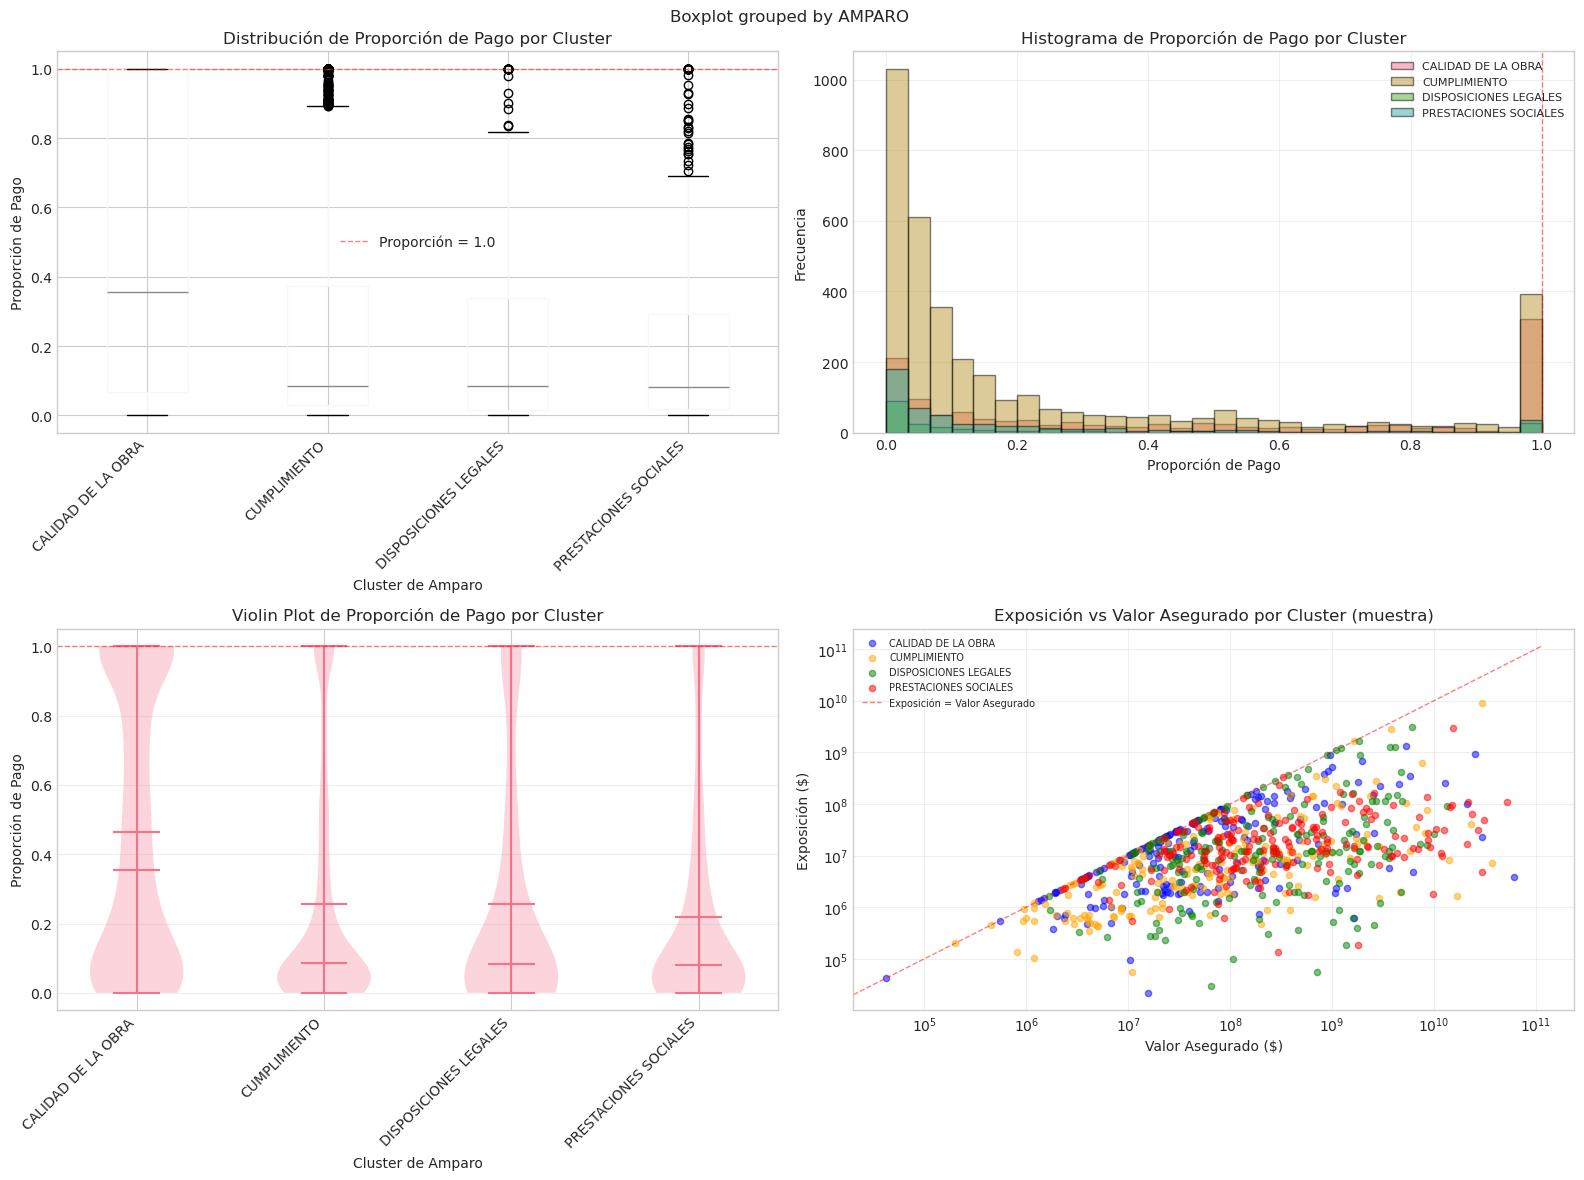


✓ Visualizaciones generadas


In [14]:
# Visualización de PROPORCION_DE_PAGO y outliers por cluster

print("=" * 80)
print("VISUALIZACIÓN DE PROPORCION_DE_PAGO POR CLUSTER")
print("=" * 80)

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Proporción de Pago por Cluster de Amparo', fontsize=16, fontweight='bold')

# 1. Boxplot de PROPORCION_DE_PAGO
ax1 = axes[0, 0]
df.boxplot(column='PROPORCION_DE_PAGO', by='AMPARO', ax=ax1, showfliers=True)
ax1.set_title('Distribución de Proporción de Pago por Cluster')
ax1.set_xlabel('Cluster de Amparo')
ax1.set_ylabel('Proporción de Pago')
ax1.axhline(y=1.0, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Proporción = 1.0')
ax1.legend()
plt.sca(ax1)
plt.xticks(rotation=45, ha='right')

# 2. Histograma de PROPORCION_DE_PAGO por cluster
ax2 = axes[0, 1]
for amparo in sorted(df['AMPARO'].unique()):
    data = df[df['AMPARO'] == amparo]['PROPORCION_DE_PAGO']
    ax2.hist(data, bins=30, alpha=0.5, label=amparo, edgecolor='black')
ax2.set_title('Histograma de Proporción de Pago por Cluster')
ax2.set_xlabel('Proporción de Pago')
ax2.set_ylabel('Frecuencia')
ax2.axvline(x=1.0, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax2.legend(fontsize=8, loc='upper right')
ax2.grid(True, alpha=0.3)

# 3. Violin plot de PROPORCION_DE_PAGO
ax3 = axes[1, 0]
clusters_ordenados = sorted(df['AMPARO'].unique())
datos_violin = [df[df['AMPARO'] == amparo]['PROPORCION_DE_PAGO'].values for amparo in clusters_ordenados]
parts = ax3.violinplot(datos_violin, positions=range(len(clusters_ordenados)), 
                        showmeans=True, showmedians=True)
ax3.set_xticks(range(len(clusters_ordenados)))
ax3.set_xticklabels(clusters_ordenados, rotation=45, ha='right')
ax3.set_title('Violin Plot de Proporción de Pago por Cluster')
ax3.set_xlabel('Cluster de Amparo')
ax3.set_ylabel('Proporción de Pago')
ax3.axhline(y=1.0, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Scatter plot: EXPOSICION vs VALOR_ASEGURADO coloreado por cluster
ax4 = axes[1, 1]
colores = {'CALIDAD DE LA OBRA': 'blue', 'CUMPLIMIENTO': 'orange', 
           'DISPOSICIONES LEGALES': 'green', 'PRESTACIONES SOCIALES': 'red'}
for amparo in sorted(df['AMPARO'].unique()):
    df_amparo = df[df['AMPARO'] == amparo]
    # Tomar una muestra para evitar sobrecarga visual
    muestra = df_amparo.sample(min(200, len(df_amparo)), random_state=42)
    ax4.scatter(muestra['VALOR_ASEGURADO'], muestra['EXPOSICION'], 
                alpha=0.5, label=amparo, c=colores.get(amparo, 'gray'), s=20)
# Línea de referencia EXPOSICION = VALOR_ASEGURADO
max_val = max(df['VALOR_ASEGURADO'].max(), df['EXPOSICION'].max())
ax4.plot([0, max_val], [0, max_val], 'r--', linewidth=1, alpha=0.5, label='Exposición = Valor Asegurado')
ax4.set_title('Exposición vs Valor Asegurado por Cluster (muestra)')
ax4.set_xlabel('Valor Asegurado ($)')
ax4.set_ylabel('Exposición ($)')
ax4.legend(fontsize=7, loc='upper left')
ax4.grid(True, alpha=0.3)
ax4.set_xscale('log')
ax4.set_yscale('log')

plt.tight_layout()
plt.show()

print("\n✓ Visualizaciones generadas")

## **Modelo de Mixtura Beta-Bernoulli**

Se implementará un modelo de mixtura para modelar la distribución de `PROPORCION_DE_PAGO` por cluster:

**Modelo:**
- **Componente 1 (Bernoulli)**: Modela casos donde proporción = 1.0 (siniestros totales)
- **Componente 2 (Beta)**: Modela casos donde proporción < 1.0 (siniestros parciales)

**Formulación:**

$$P(x) = \pi \cdot \delta(x=1) + (1-\pi) \cdot \text{Beta}(x; \alpha, \beta)$$

Donde:
- $\pi$ = probabilidad de siniestro total (proporción = 1)
- $\alpha, \beta$ = parámetros de la distribución Beta
- Parámetros estimados por cluster usando MLE (Maximum Likelihood Estimation)

In [15]:
# Análisis exploratorio para mixtura Beta-Bernoulli

print("=" * 80)
print("ANÁLISIS EXPLORATORIO PARA MODELO DE MIXTURA")
print("=" * 80)

# Separar datos en proporción = 1.0 vs < 1.0
df['ES_TOTAL'] = (df['PROPORCION_DE_PAGO'] == 1.0)

print("\n" + "=" * 80)
print("DISTRIBUCIÓN DE SINIESTROS TOTALES VS PARCIALES POR CLUSTER")
print("=" * 80)

resultados_mixtura = {}

for amparo in sorted(df['AMPARO'].unique()):
    df_amparo = df[df['AMPARO'] == amparo].copy()
    
    n_total = len(df_amparo)
    n_totales = (df_amparo['PROPORCION_DE_PAGO'] == 1.0).sum()
    n_parciales = n_total - n_totales
    pct_totales = (n_totales / n_total) * 100
    
    # Datos para componente Beta (proporción < 1)
    proporciones_parciales = df_amparo[df_amparo['PROPORCION_DE_PAGO'] < 1.0]['PROPORCION_DE_PAGO']
    
    resultados_mixtura[amparo] = {
        'n_total': n_total,
        'n_totales': n_totales,
        'n_parciales': n_parciales,
        'pi': pct_totales / 100,  # Probabilidad de ser total
        'proporciones_parciales': proporciones_parciales
    }
    
    print(f"\n{amparo}:")
    print(f"  Total siniestros: {n_total:,}")
    print(f"  Siniestros totales (proporción = 1): {n_totales:,} ({pct_totales:.2f}%)")
    print(f"  Siniestros parciales (proporción < 1): {n_parciales:,} ({100-pct_totales:.2f}%)")
    print(f"  π (prob. de siniestro total): {pct_totales/100:.4f}")
    
    if n_parciales > 0:
        print(f"\n  Estadísticas de proporciones parciales:")
        print(f"    Media: {proporciones_parciales.mean():.4f}")
        print(f"    Mediana: {proporciones_parciales.median():.4f}")
        print(f"    Desv. Est.: {proporciones_parciales.std():.4f}")
        print(f"    Mínimo: {proporciones_parciales.min():.6f}")
        print(f"    Máximo: {proporciones_parciales.max():.6f}")

print("\n" + "=" * 80)
print("TABLA RESUMEN")
print("=" * 80)

print(f"\n{'Cluster':<30} {'N Total':>10} {'N=1.0':>10} {'N<1.0':>10} {'π':>8}")
print("-" * 70)
for amparo in sorted(resultados_mixtura.keys()):
    stats = resultados_mixtura[amparo]
    print(f"{amparo:<30} {stats['n_total']:>10,} {stats['n_totales']:>10,} {stats['n_parciales']:>10,} {stats['pi']:>8.4f}")

print("\n✓ Análisis exploratorio completado")

ANÁLISIS EXPLORATORIO PARA MODELO DE MIXTURA

DISTRIBUCIÓN DE SINIESTROS TOTALES VS PARCIALES POR CLUSTER

CALIDAD DE LA OBRA:
  Total siniestros: 1,223
  Siniestros totales (proporción = 1): 278 (22.73%)
  Siniestros parciales (proporción < 1): 945 (77.27%)
  π (prob. de siniestro total): 0.2273

  Estadísticas de proporciones parciales:
    Media: 0.3070
    Mediana: 0.1880
    Desv. Est.: 0.3089
    Mínimo: 0.000000
    Máximo: 1.000000

CUMPLIMIENTO:
  Total siniestros: 3,745
  Siniestros totales (proporción = 1): 361 (9.64%)
  Siniestros parciales (proporción < 1): 3,384 (90.36%)
  π (prob. de siniestro total): 0.0964

  Estadísticas de proporciones parciales:
    Media: 0.1774
    Mediana: 0.0733
    Desv. Est.: 0.2362
    Mínimo: 0.000000
    Máximo: 1.000000

DISPOSICIONES LEGALES:
  Total siniestros: 238
  Siniestros totales (proporción = 1): 25 (10.50%)
  Siniestros parciales (proporción < 1): 213 (89.50%)
  π (prob. de siniestro total): 0.1050

  Estadísticas de proporciones

In [16]:
# Verificación de librerías disponibles para mixturas

print("=" * 80)
print("LIBRERÍAS DISPONIBLES PARA MODELOS DE MIXTURA")
print("=" * 80)

librerias_disponibles = {}

# 1. scipy.stats (distribución Beta)
try:
    from scipy import stats
    from scipy.optimize import minimize
    librerias_disponibles['scipy'] = True
    print("\n✓ scipy.stats - Disponible")
    print("  - Contiene distribución Beta: stats.beta")
    print("  - Optimización: scipy.optimize.minimize para MLE")
except ImportError:
    librerias_disponibles['scipy'] = False
    print("\n✗ scipy - No disponible")

# 2. sklearn.mixture (para mixturas Gaussianas, adaptable)
try:
    from sklearn import mixture
    librerias_disponibles['sklearn'] = True
    print("\n✓ sklearn.mixture - Disponible")
    print("  - GaussianMixture, BayesianGaussianMixture")
    print("  - No tiene Beta directamente, pero útil como referencia")
except ImportError:
    librerias_disponibles['sklearn'] = False
    print("\n✗ sklearn - No disponible")

# 3. PyMC (Bayesiano - ideal para mixturas complejas)
try:
    import pymc as pm
    librerias_disponibles['pymc'] = True
    print("\n✓ PyMC - Disponible")
    print("  - Ideal para modelos de mixtura Bayesianos")
    print("  - Versión:", pm.__version__)
except ImportError:
    try:
        import pymc3 as pm
        librerias_disponibles['pymc3'] = True
        print("\n✓ PyMC3 - Disponible (versión antigua)")
        print("  - Ideal para modelos de mixtura Bayesianos")
    except ImportError:
        librerias_disponibles['pymc'] = False
        print("\n✗ PyMC/PyMC3 - No disponible")
        print("  - Se puede instalar con: pip install pymc")

# 4. statsmodels
try:
    import statsmodels.api as sm
    librerias_disponibles['statsmodels'] = True
    print("\n✓ statsmodels - Disponible")
    print("  - Modelos estadísticos avanzados")
except ImportError:
    librerias_disponibles['statsmodels'] = False
    print("\n✗ statsmodels - No disponible")

print("\n" + "=" * 80)
print("RECOMENDACIÓN")
print("=" * 80)

if librerias_disponibles.get('scipy', False):
    print("\n✓ Implementaremos el modelo usando scipy.stats + optimización manual")
    print("  Ventajas:")
    print("  - Ya disponible en el entorno")
    print("  - Control total sobre el proceso de estimación")
    print("  - Rápido y eficiente para MLE")
    print("\n  Implementación:")
    print("  - Componente Bernoulli: π = N(proporción=1) / N_total")
    print("  - Componente Beta: Ajustar Beta(α,β) a proporciones < 1 usando MLE")
    print("  - Log-likelihood = Σ[log(π) si x=1, log(1-π) + log(Beta(x;α,β)) si x<1]")
else:
    print("\n⚠ scipy no disponible. Se recomienda instalar con: pip install scipy")

print("\n✓ Verificación completada")

LIBRERÍAS DISPONIBLES PARA MODELOS DE MIXTURA

✓ scipy.stats - Disponible
  - Contiene distribución Beta: stats.beta
  - Optimización: scipy.optimize.minimize para MLE

✓ sklearn.mixture - Disponible
  - GaussianMixture, BayesianGaussianMixture
  - No tiene Beta directamente, pero útil como referencia

✗ PyMC/PyMC3 - No disponible
  - Se puede instalar con: pip install pymc

✓ statsmodels - Disponible
  - Modelos estadísticos avanzados

RECOMENDACIÓN

✓ Implementaremos el modelo usando scipy.stats + optimización manual
  Ventajas:
  - Ya disponible en el entorno
  - Control total sobre el proceso de estimación
  - Rápido y eficiente para MLE

  Implementación:
  - Componente Bernoulli: π = N(proporción=1) / N_total
  - Componente Beta: Ajustar Beta(α,β) a proporciones < 1 usando MLE
  - Log-likelihood = Σ[log(π) si x=1, log(1-π) + log(Beta(x;α,β)) si x<1]

✓ Verificación completada


In [17]:
# Implementación del modelo de mixtura Beta-Bernoulli

from scipy import stats
from scipy.optimize import minimize
from scipy.special import betaln

print("=" * 80)
print("AJUSTE DEL MODELO DE MIXTURA BETA-BERNOULLI POR CLUSTER")
print("=" * 80)

def ajustar_beta_mle(datos):
    """
    Ajusta una distribución Beta a los datos usando MLE.
    datos: array de valores en (0, 1)
    Retorna: (alpha, beta, log_likelihood)
    """
    # Filtrar valores exactos 0 o 1 para Beta (no están en el dominio)
    datos_validos = datos[(datos > 0) & (datos < 1)]
    
    if len(datos_validos) < 2:
        return None, None, -np.inf
    
    # Función de log-verosimilitud negativa para Beta
    def neg_log_likelihood(params):
        alpha, beta = params
        if alpha <= 0 or beta <= 0:
            return 1e10  # Penalización por parámetros inválidos
        
        # Log-likelihood de Beta usando betaln para estabilidad numérica
        ll = np.sum(stats.beta.logpdf(datos_validos, alpha, beta))
        return -ll
    
    # Estimación inicial usando método de momentos
    mean = datos_validos.mean()
    var = datos_validos.var()
    
    # Evitar divisiones por cero
    if var >= mean * (1 - mean) or var == 0:
        alpha_init = 1.0
        beta_init = 1.0
    else:
        alpha_init = mean * ((mean * (1 - mean) / var) - 1)
        beta_init = (1 - mean) * ((mean * (1 - mean) / var) - 1)
    
    # Asegurar valores positivos
    alpha_init = max(0.1, alpha_init)
    beta_init = max(0.1, beta_init)
    
    # Optimización
    try:
        result = minimize(
            neg_log_likelihood,
            x0=[alpha_init, beta_init],
            method='L-BFGS-B',
            bounds=[(0.001, None), (0.001, None)]
        )
        
        if result.success:
            alpha_opt, beta_opt = result.x
            ll = -result.fun
            return alpha_opt, beta_opt, ll
        else:
            return alpha_init, beta_init, -neg_log_likelihood([alpha_init, beta_init])
    except:
        return alpha_init, beta_init, -neg_log_likelihood([alpha_init, beta_init])

# Ajustar modelo por cluster
modelos_por_cluster = {}

print("\nAjustando modelo de mixtura por cluster...")
print()

for amparo in sorted(df['AMPARO'].unique()):
    print(f"\n{'=' * 80}")
    print(f"CLUSTER: {amparo}")
    print(f"{'=' * 80}")
    
    df_amparo = df[df['AMPARO'] == amparo].copy()
    proporciones = df_amparo['PROPORCION_DE_PAGO'].values
    
    # Componente Bernoulli (proporción = 1)
    n_total = len(proporciones)
    n_totales = (proporciones == 1.0).sum()
    pi = n_totales / n_total
    
    # Componente Beta (proporción < 1)
    proporciones_parciales = proporciones[proporciones < 1.0]
    
    if len(proporciones_parciales) > 0:
        alpha, beta, ll_beta = ajustar_beta_mle(proporciones_parciales)
    else:
        alpha, beta, ll_beta = None, None, 0
    
    # Calcular log-likelihood total de la mixtura
    ll_total = 0
    if n_totales > 0:
        ll_total += n_totales * np.log(pi) if pi > 0 else 0
    if len(proporciones_parciales) > 0 and alpha is not None:
        ll_total += len(proporciones_parciales) * np.log(1 - pi) if (1-pi) > 0 else 0
        ll_total += ll_beta
    
    # Calcular AIC y BIC
    n_params = 3  # π, α, β
    aic = 2 * n_params - 2 * ll_total
    bic = n_params * np.log(n_total) - 2 * ll_total
    
    modelos_por_cluster[amparo] = {
        'pi': pi,
        'alpha': alpha,
        'beta': beta,
        'n_total': n_total,
        'n_totales': n_totales,
        'n_parciales': len(proporciones_parciales),
        'log_likelihood': ll_total,
        'aic': aic,
        'bic': bic
    }
    
    print(f"\nParámetros estimados:")
    print(f"  π (prob. siniestro total): {pi:.6f}")
    if alpha is not None:
        print(f"  α (forma Beta): {alpha:.6f}")
        print(f"  β (forma Beta): {beta:.6f}")
        print(f"\n  Media Beta: {alpha/(alpha+beta):.6f}")
        print(f"  Varianza Beta: {(alpha*beta)/((alpha+beta)**2*(alpha+beta+1)):.6f}")
    
    print(f"\nBondad de ajuste:")
    print(f"  Log-likelihood: {ll_total:.2f}")
    print(f"  AIC: {aic:.2f}")
    print(f"  BIC: {bic:.2f}")

print("\n" + "=" * 80)
print("TABLA RESUMEN DE PARÁMETROS POR CLUSTER")
print("=" * 80)

print(f"\n{'Cluster':<30} {'π':>8} {'α':>10} {'β':>10} {'AIC':>12} {'BIC':>12}")
print("-" * 84)
for amparo in sorted(modelos_por_cluster.keys()):
    modelo = modelos_por_cluster[amparo]
    alpha_str = f"{modelo['alpha']:.4f}" if modelo['alpha'] is not None else "N/A"
    beta_str = f"{modelo['beta']:.4f}" if modelo['beta'] is not None else "N/A"
    print(f"{amparo:<30} {modelo['pi']:>8.6f} {alpha_str:>10} {beta_str:>10} {modelo['aic']:>12.2f} {modelo['bic']:>12.2f}")

print("\n✓ Ajuste del modelo completado")

AJUSTE DEL MODELO DE MIXTURA BETA-BERNOULLI POR CLUSTER

Ajustando modelo de mixtura por cluster...


CLUSTER: CALIDAD DE LA OBRA

Parámetros estimados:
  π (prob. siniestro total): 0.227310
  α (forma Beta): 0.361241
  β (forma Beta): 0.541713

  Media Beta: 0.400066
  Varianza Beta: 0.126127

Bondad de ajuste:
  Log-likelihood: -192.12
  AIC: 390.25
  BIC: 405.57

CLUSTER: CUMPLIMIENTO

Parámetros estimados:
  π (prob. siniestro total): 0.096395
  α (forma Beta): 0.405040
  β (forma Beta): 1.342754

  Media Beta: 0.231743
  Varianza Beta: 0.064793

Bondad de ajuste:
  Log-likelihood: 1405.12
  AIC: -2804.23
  BIC: -2785.55

CLUSTER: DISPOSICIONES LEGALES

Parámetros estimados:
  π (prob. siniestro total): 0.105042
  α (forma Beta): 0.339790
  β (forma Beta): 1.197896

  Media Beta: 0.220975
  Varianza Beta: 0.067835

Bondad de ajuste:
  Log-likelihood: 133.30
  AIC: -260.60
  BIC: -250.18

CLUSTER: PRESTACIONES SOCIALES

Parámetros estimados:
  π (prob. siniestro total): 0.055556
  α

In [ ]:
# Visualización del ajuste del modelo de mixtura

print("=" * 80)
print("VISUALIZACIÓN DEL AJUSTE DEL MODELO")
print("=" * 80)

# Crear figura con subplots para cada cluster
n_clusters = len(modelos_por_cluster)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

fig.suptitle('Ajuste del Modelo de Mixtura Beta-Bernoulli por Cluster', 
             fontsize=16, fontweight='bold')

for idx, amparo in enumerate(sorted(modelos_por_cluster.keys())):
    ax = axes[idx]
    
    # Obtener datos y modelo
    df_amparo = df[df['AMPARO'] == amparo].copy()
    proporciones = df_amparo['PROPORCION_DE_PAGO'].values
    modelo = modelos_por_cluster[amparo]
    
    # Histograma de datos empíricos (solo proporciones < 1)
    proporciones_parciales = proporciones[proporciones < 1.0]
    
    if len(proporciones_parciales) > 0:
        # Histograma
        ax.hist(proporciones_parciales, bins=30, density=True, alpha=0.6, 
                color='skyblue', edgecolor='black', label='Datos empíricos (prop < 1)')
    
    # Curva de la distribución Beta ajustada
    if modelo['alpha'] is not None and modelo['beta'] is not None:
        x = np.linspace(0.001, 0.999, 1000)
        y_beta = stats.beta.pdf(x, modelo['alpha'], modelo['beta'])
        
        # Escalar por (1-π) para representar la mixtura completa
        y_mixtura = (1 - modelo['pi']) * y_beta
        
        ax.plot(x, y_beta, 'r-', linewidth=2, 
                label=f'Beta({modelo["alpha"]:.2f}, {modelo["beta"]:.2f})')
    
    # Agregar masa de probabilidad en 1.0 (componente Bernoulli)
    if modelo['pi'] > 0:
        # Representar como barra vertical en x=1
        ax.axvline(x=1.0, color='darkgreen', linestyle='--', linewidth=2, 
                   label=f'P(x=1) = {modelo["pi"]:.3f}')
        
        # Agregar anotación
        max_y = ax.get_ylim()[1]
        ax.annotate(f'π = {modelo["pi"]:.3f}', 
                    xy=(1.0, max_y * 0.8), 
                    xytext=(0.85, max_y * 0.9),
                    arrowprops=dict(arrowstyle='->', color='darkgreen'),
                    fontsize=10, color='darkgreen', fontweight='bold')
    
    # Formatear parámetros para el título
    alpha_str = f"{modelo['alpha']:.2f}" if modelo['alpha'] is not None else "N/A"
    beta_str = f"{modelo['beta']:.2f}" if modelo['beta'] is not None else "N/A"
    
    ax.set_title(f'{amparo}\nπ={modelo["pi"]:.3f}, α={alpha_str}, β={beta_str}',
                 fontsize=10)
    ax.set_xlabel('Proporción de Pago')
    ax.set_ylabel('Densidad')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.05, 1.05)

plt.tight_layout()
plt.show()

print("\n✓ Visualizaciones generadas")

In [ ]:
# Simulación y predicción con el modelo de mixtura

print("=" * 80)
print("SIMULACIÓN Y PREDICCIÓN CON EL MODELO DE MIXTURA")
print("=" * 80)

def simular_mixtura_beta_bernoulli(pi, alpha, beta, n_muestras=1000, random_seed=42):
    """
    Simula muestras de una mixtura Beta-Bernoulli.
    
    Parámetros:
    - pi: probabilidad de que la proporción sea 1 (componente Bernoulli)
    - alpha, beta: parámetros de la distribución Beta
    - n_muestras: número de muestras a generar
    - random_seed: semilla para reproducibilidad
    
    Retorna:
    - Array de proporciones simuladas
    """
    np.random.seed(random_seed)
    
    # Generar variable indicadora: 1 si es siniestro total, 0 si parcial
    es_total = np.random.binomial(1, pi, n_muestras)
    
    # Para siniestros totales, proporción = 1
    # Para siniestros parciales, generar desde Beta
    proporciones = np.zeros(n_muestras)
    proporciones[es_total == 1] = 1.0
    
    n_parciales = (es_total == 0).sum()
    if n_parciales > 0 and alpha is not None and beta is not None:
        proporciones[es_total == 0] = np.random.beta(alpha, beta, n_parciales)
    
    return proporciones

def calcular_percentiles_modelo(pi, alpha, beta, percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]):
    """
    Calcula percentiles del modelo de mixtura usando simulación.
    """
    simulacion = simular_mixtura_beta_bernoulli(pi, alpha, beta, n_muestras=10000)
    return np.percentile(simulacion, [p*100 for p in percentiles])

# Simulaciones por cluster
print("\nGenerando simulaciones por cluster...")
print()

simulaciones_por_cluster = {}

for amparo in sorted(modelos_por_cluster.keys()):
    modelo = modelos_por_cluster[amparo]
    
    print(f"\n{'=' * 80}")
    print(f"CLUSTER: {amparo}")
    print(f"{'=' * 80}")
    
    # Generar simulación
    n_sim = 5000
    simulacion = simular_mixtura_beta_bernoulli(
        modelo['pi'], 
        modelo['alpha'], 
        modelo['beta'], 
        n_muestras=n_sim
    )
    
    simulaciones_por_cluster[amparo] = simulacion
    
    # Calcular estadísticas de la simulación
    print(f"\nEstadísticas de {n_sim:,} simulaciones:")
    print(f"  Media: {simulacion.mean():.4f}")
    print(f"  Mediana: {np.median(simulacion):.4f}")
    print(f"  Desv. Est.: {simulacion.std():.4f}")
    print(f"  % de siniestros totales (=1): {(simulacion == 1.0).sum() / n_sim * 100:.2f}%")
    
    # Percentiles
    percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
    percentiles_valores = np.percentile(simulacion, [p*100 for p in percentiles])
    
    print(f"\n  Percentiles:")
    for p, val in zip(percentiles, percentiles_valores):
        print(f"    P{p*100:.0f}: {val:.4f}")
    
    # Comparar con datos reales
    df_amparo = df[df['AMPARO'] == amparo]
    proporciones_reales = df_amparo['PROPORCION_DE_PAGO'].values
    
    print(f"\n  Comparación con datos reales:")
    print(f"    Media real: {proporciones_reales.mean():.4f} vs Simulada: {simulacion.mean():.4f}")
    print(f"    Mediana real: {np.median(proporciones_reales):.4f} vs Simulada: {np.median(simulacion):.4f}")
    print(f"    % totales real: {(proporciones_reales == 1.0).sum() / len(proporciones_reales) * 100:.2f}% vs Simulado: {(simulacion == 1.0).sum() / n_sim * 100:.2f}%")

print("\n" + "=" * 80)
print("TABLA RESUMEN DE PERCENTILES POR CLUSTER")
print("=" * 80)

print(f"\n{'Cluster':<30} {'P50':>8} {'P75':>8} {'P90':>8} {'P95':>8} {'P99':>8}")
print("-" * 72)
for amparo in sorted(simulaciones_por_cluster.keys()):
    sim = simulaciones_por_cluster[amparo]
    p50, p75, p90, p95, p99 = np.percentile(sim, [50, 75, 90, 95, 99])
    print(f"{amparo:<30} {p50:>8.4f} {p75:>8.4f} {p90:>8.4f} {p95:>8.4f} {p99:>8.4f}")

print("\n✓ Simulaciones completadas")

In [ ]:
# Visualización comparativa: Datos reales vs Modelo

print("=" * 80)
print("VISUALIZACIÓN COMPARATIVA: DATOS REALES VS SIMULACIÓN")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

fig.suptitle('Comparación Datos Reales vs Modelo de Mixtura Beta-Bernoulli', 
             fontsize=16, fontweight='bold')

for idx, amparo in enumerate(sorted(modelos_por_cluster.keys())):
    ax = axes[idx]
    
    # Datos reales
    df_amparo = df[df['AMPARO'] == amparo]
    proporciones_reales = df_amparo['PROPORCION_DE_PAGO'].values
    
    # Simulación
    simulacion = simulaciones_por_cluster[amparo]
    
    # Histogramas superpuestos
    bins = np.linspace(0, 1, 31)
    
    ax.hist(proporciones_reales, bins=bins, density=True, alpha=0.5, 
            color='blue', edgecolor='black', label='Datos reales')
    ax.hist(simulacion, bins=bins, density=True, alpha=0.5, 
            color='red', edgecolor='black', label='Simulación modelo')
    
    # Línea vertical en proporción = 1
    ax.axvline(x=1.0, color='green', linestyle='--', linewidth=1.5, alpha=0.7)
    
    # Estadísticas y formateo de parámetros
    modelo = modelos_por_cluster[amparo]
    alpha_str = f"{modelo['alpha']:.2f}" if modelo['alpha'] is not None else "N/A"
    beta_str = f"{modelo['beta']:.2f}" if modelo['beta'] is not None else "N/A"
    
    ax.set_title(f'{amparo}\nπ={modelo["pi"]:.3f}, α={alpha_str}, β={beta_str}',
                 fontsize=10)
    ax.set_xlabel('Proporción de Pago')
    ax.set_ylabel('Densidad')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-0.05, 1.05)

plt.tight_layout()
plt.show()

# QQ-plot para evaluar bondad de ajuste (solo para proporciones < 1)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

fig.suptitle('QQ-Plot: Ajuste de Distribución Beta (solo proporciones < 1)', 
             fontsize=16, fontweight='bold')

for idx, amparo in enumerate(sorted(modelos_por_cluster.keys())):
    ax = axes[idx]
    
    # Datos reales (solo proporciones < 1)
    df_amparo = df[df['AMPARO'] == amparo]
    proporciones_parciales_reales = df_amparo[df_amparo['PROPORCION_DE_PAGO'] < 1.0]['PROPORCION_DE_PAGO'].values
    
    modelo = modelos_por_cluster[amparo]
    
    if len(proporciones_parciales_reales) > 0 and modelo['alpha'] is not None:
        # Ordenar datos reales
        datos_ordenados = np.sort(proporciones_parciales_reales)
        
        # Cuantiles teóricos de Beta
        n = len(datos_ordenados)
        probabilidades = (np.arange(1, n + 1) - 0.5) / n
        cuantiles_teoricos = stats.beta.ppf(probabilidades, modelo['alpha'], modelo['beta'])
        
        # QQ-plot
        ax.scatter(cuantiles_teoricos, datos_ordenados, alpha=0.5, s=20)
        
        # Línea de referencia 45°
        min_val = min(cuantiles_teoricos.min(), datos_ordenados.min())
        max_val = max(cuantiles_teoricos.max(), datos_ordenados.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, 
                label='Ajuste perfecto')
        
        ax.set_title(f'{amparo}\n(n={len(proporciones_parciales_reales):,} observaciones < 1)')
        ax.set_xlabel('Cuantiles teóricos Beta')
        ax.set_ylabel('Cuantiles empíricos')
        ax.legend()
        ax.grid(True, alpha=0.3)
    else:
        ax.text(0.5, 0.5, 'Sin datos suficientes\npara proporciones < 1', 
                ha='center', va='center', fontsize=12)
        ax.set_title(f'{amparo}')

plt.tight_layout()
plt.show()

print("\n✓ Visualizaciones comparativas generadas")